# Assignement 2 - Filippo Conforto


## Exercise 1

In order to work on events and their probabilities, they need to be stored in vectors.

In [2]:
x = c(15.58, 15.9, 16, 16.1, 16.2)
p1 = c(0.15,0.21,0.35, 0.15, 0.14)
p2 = c(0.14, 0.05, 0.64, 0.08, 0.09)

Using standard R functions summary statistics can be obtained

In [9]:
message("The mean obtained using the first set of probabilities is: ",sum(x*p1))
message("The mean obtained using the first set of probabilities is: ",sum(x*p2))

message("The variance obtaines using the first of probabilities is: ",format(sqrt(sum((x^2)*p1) - sum(x*p1)^2), digits = 5))
message("The variance obtaines using the first of probabilities is: ",format(sqrt(sum((x^2)*p2) - sum(x*p2)^2), digits = 5))


The mean obtained using the first set of probabilities is: 15.959

The mean obtained using the first set of probabilities is: 15.9622

The variance obtaines using the first of probabilities is: 0.18433

The variance obtaines using the first of probabilities is: 0.16783



## Exercise 2

The function `rexp()` is used to simulate the waiting time for 50 people at the doctor

In [10]:
sim = rexp(50,rate = 1/30)

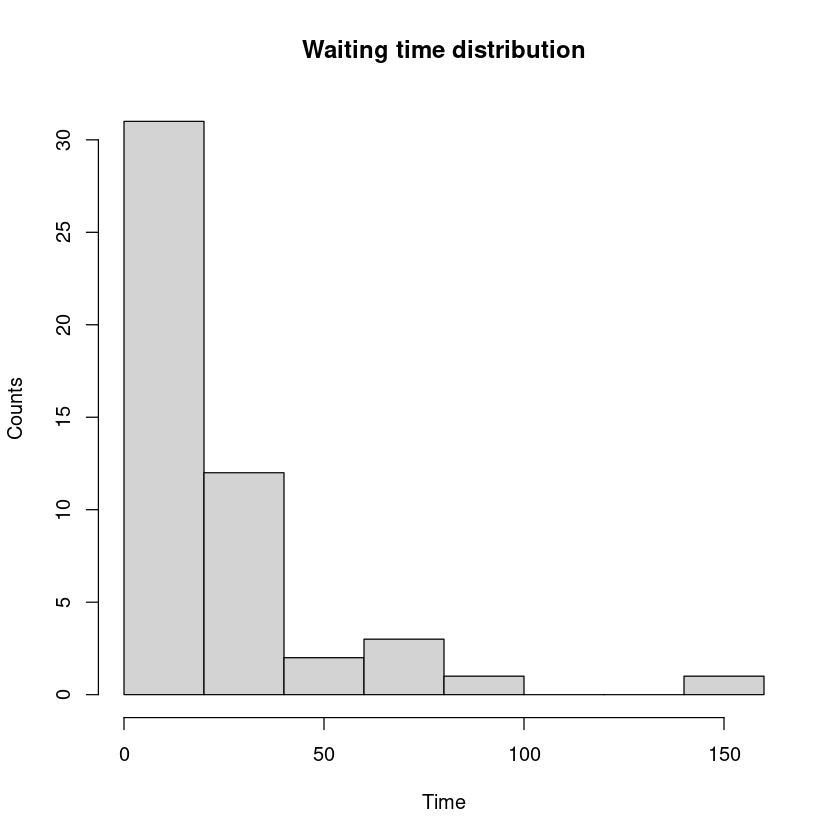

In [14]:
hist(sim, main = "Waiting time distribution", xlab = "Time", ylab = "Counts")

The probability to wait less than 10 minutes is obtained as the cumulative for the exponential distribution (`pexp()`) calculated at 10 minutes.

In [19]:
message("The probability to wait less than 10 minutes is ",format(pexp(10, rate= 1/30),digits = 4))

The probability to wait less than 10 minutes is 0.2835



In [21]:
message("The average waiting time obtained from simulated data is ",format(pexp(10, rate= 1/30),digits = 4)
        ,", very similar to the theorical one: ", format(1/3, digits =4))

The average waiting time obtained from simulated data is 0.2835, very similar to the theorical one: 0.3333



The probability to wait more than one hour is obtain as the difference between 1 and the probability to wait less than an hour, calculated as before.

In [23]:
message("The probability to wait more than one hour is ",format(1 - pexp(60, rate=1/30 ), digits = 4))

The probability to wait more than one hour is 0.1353



## Exercise 3

Since the expectation is of one error every three pages, if we consider a unit of three pages, then $\lambda = \frac{1}{3}$

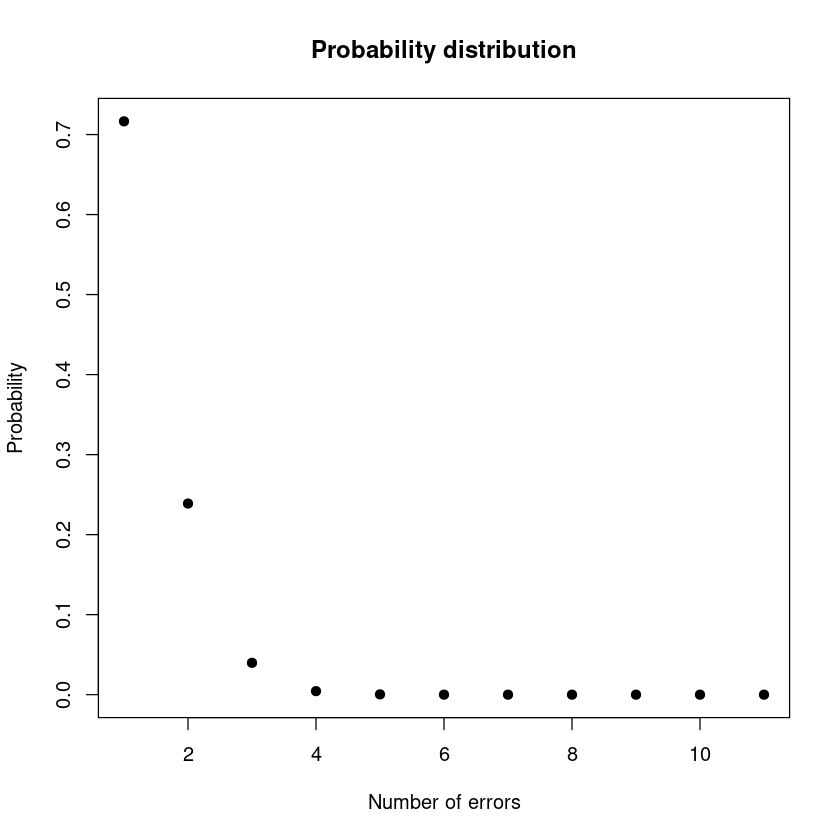

In [29]:
plot(dpois(0:10, 1/3), xlab = "Number of errors", ylab = "Probability", main = "Probability distribution", pch = 19)

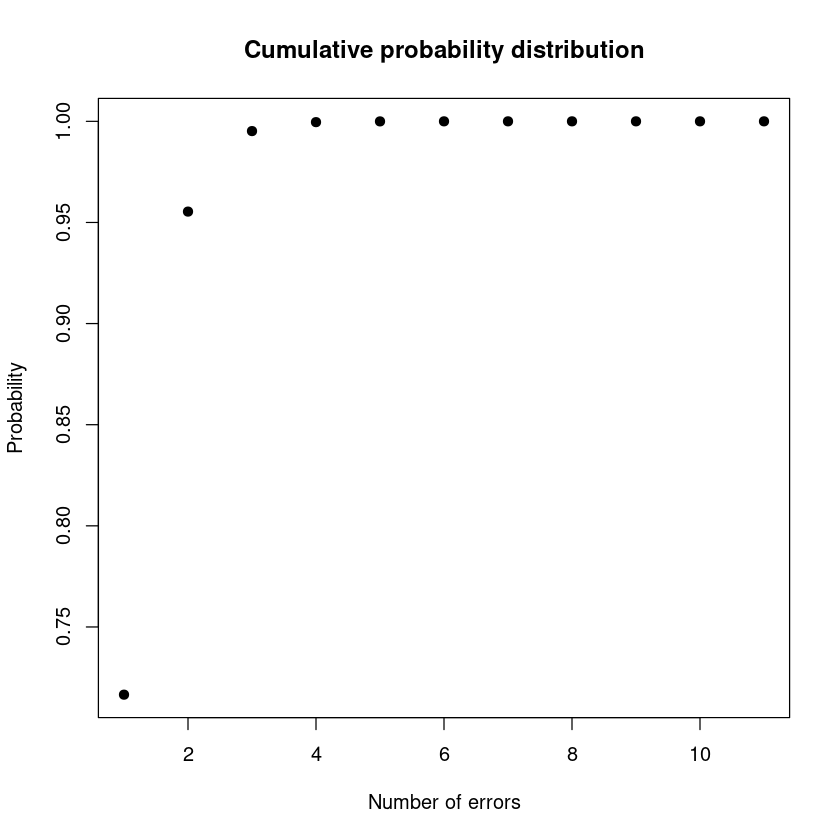

In [30]:
plot(ppois(0:10, 1/3), xlab = "Number of errors", ylab = "Probability", main = "Cumulative probability distribution", pch = 19)

The probability to get at least one error on a specific page of the book is obtained as the difference between 1 and the probability to have 0 errors on a page

In [32]:
message("The probability to get at least one error is ",format(1-dpois(0, 1/3), digits=4))

The probability to get at least one error is 0.2835



## Exercise 4

The probability that at least 10 draws are needed can be obtained using a geometric distribution, since it regards the probability to have a success after a number of trials.

In [33]:
message("The probability to that at least 10 draws are needed is ", format(1-pgeom(9,1/13), digits =4))

The probability to that at least 10 draws are needed is 0.4491



## Exercise 5

As for the distribution implemented in R, 4 function can be defined. 

In [35]:
dtolc = function(x,c=6) {
    #Returns the pdf computed in x
    ifelse((x>1) & (x<2), c*(x-1)*(2-x), 0) 
}

The the probability distribution and the `integrate()` function, allows to check if the integral is normalized to 1 using the default parameter c=6.

In [36]:
x.integral = integrate(dtolc, 1, 2)

In [41]:
message("The integration result is ", x.integral$value, " with error ", format(x.integral$abs.error, digits = 4))

The integration result is 1 with error 1.11e-14



The other function can now be defined

In [2]:
ptolc = function(x,c=6){
    # Returns the cdf computed in x
    ifelse((x>1) & (x<2), c*(-(x^3)/3+3/2*x^2-2*x+5/6), ifelse(x<=1,0,1))
}

Since it is not possible to find analitically the inverse cumulative function, the uroot function is used in order to find computationally the corresponding quantile for each probability

In [45]:
invcdf = function (x) uniroot(function(y){ptolc(y,c) - x}, lower = 1, upper = 2)$root

In [46]:
qtolc = function(x,c=6){
    # Returns the quantile corresponding to the probability given
    ifelse((x>=0) & (x <=1),sapply(x,invcdf),NA)
}

In [47]:
rtolc = function(n,c=6){
    # Returns a set of simulated values, drawn from the distribution
    us = runif(n)
    return (ifelse((us>=0) & (us <=1),sapply(us,invcdf),NA))
}

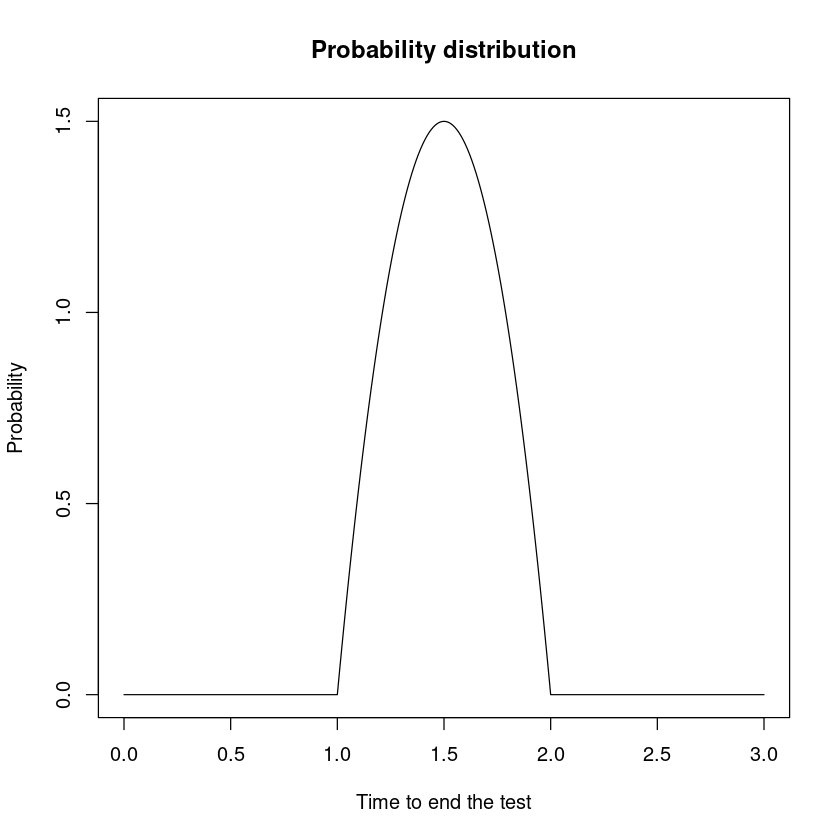

In [66]:
plot(seq(0,3,0.01),dtolc(seq(0,3,0.01),), xlab = "Time to end the test", ylab = "Probability", main = "Probability distribution", type='l')

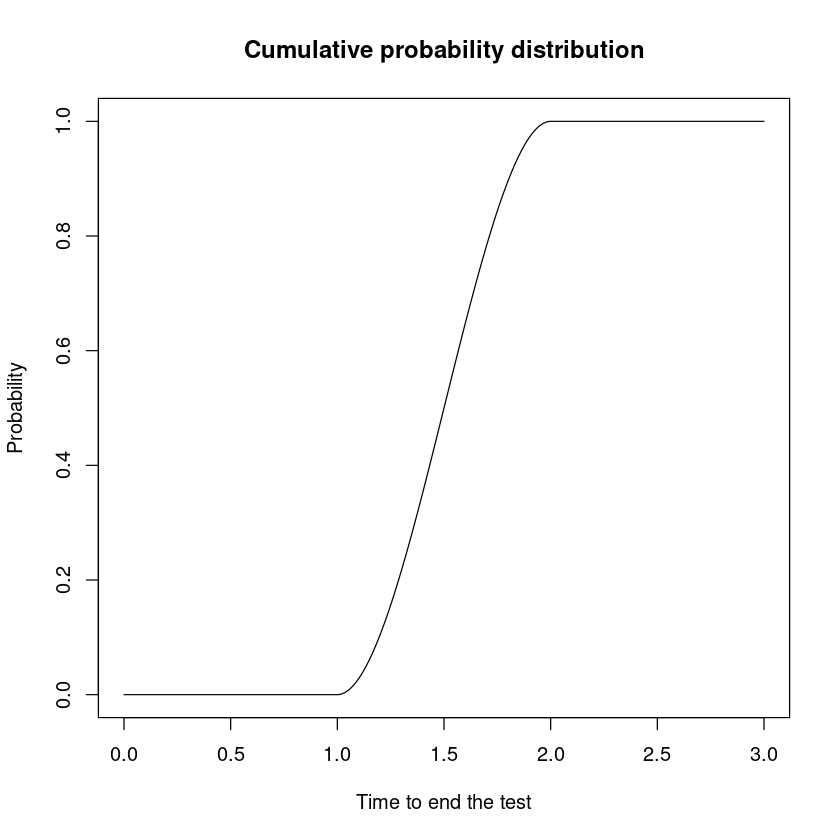

In [67]:
plot(seq(0,3,0.01),ptolc(seq(0,3,0.01),), xlab = "Time to end the test", ylab = "Probability", main = "Cumulative probability distribution", type='l')

The probability to do the exam in more than 75 minutes is obtained as the difference between 1 and the probability to do the exam in less than 75 minutes

In [57]:
message("The probability to do the exam in more than 75 minutes is ",format(1-ptolc(5/4), digits = 4))

The probability to do the exam in more than 75 minutes is 0.8437



In the same way the probability to do the exam in a time between 75 and 120 minutes can be obtained using the cumulative distribution function

In [4]:
message("The probability to do the exam in a time between 90 and 120 minutes is ",format(ptolc(2)-ptolc(1.5), digits = 4))

The probability to do the exam in a time between 90 and 120 minutes is 0.5



## Exercise 6

As for the previous exercise the 4 function can be defined by using the pdf, the cdf integrated analitically and the inverse cumulative function, that this time can be computed analitically too.

In [1]:
dtire = function(x,c=6) {
    #Returns the pdf computed in x
    ifelse((x>1) & (x<2), 2/x^2, 0)
}

In [2]:
ptire = function(x,c=6){
    #Returns the cdf computed in x
    ifelse((x>1) & (x<2), -2/x+2, ifelse(x<=1,0,1))
}

In [3]:
qtire = function(x,c=6){
    # Returns the quantile corresponding to the probability given
    2/(-x+2)
}

In [4]:
rtire = function(n,c=6){
    # Returns a set of simulated values, drawn from the distribution
    us = runif(n)
    return(2/(-us+2))  
}

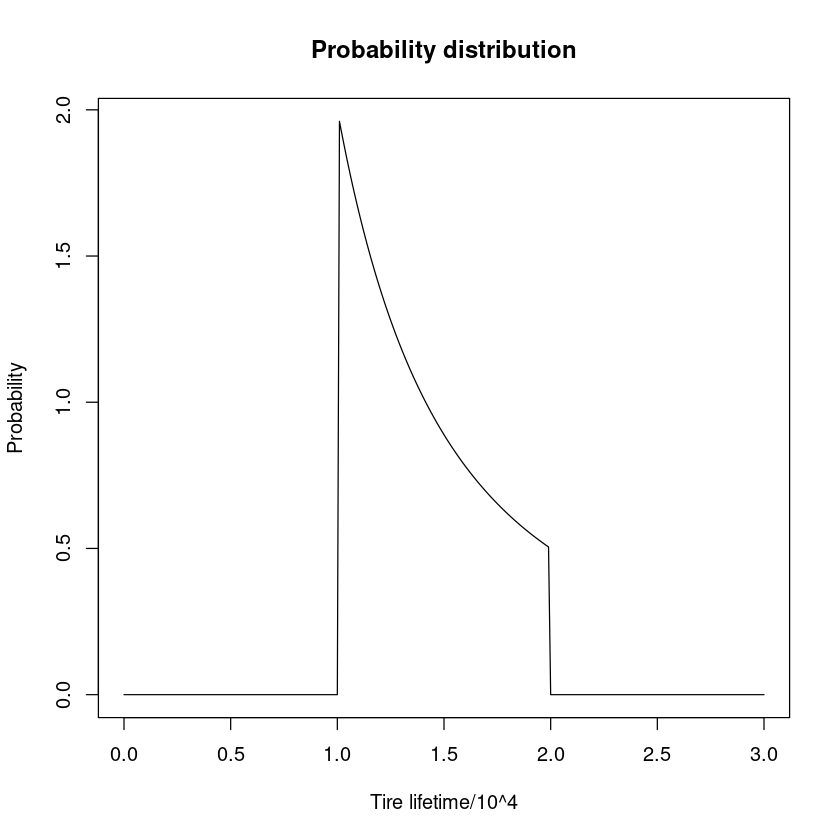

In [11]:
plot(seq(0,3,0.01),dtire(seq(0,3,0.01),), xlab = expression("Tire lifetime/10^4"), ylab = "Probability", main = "Probability distribution", type='l')

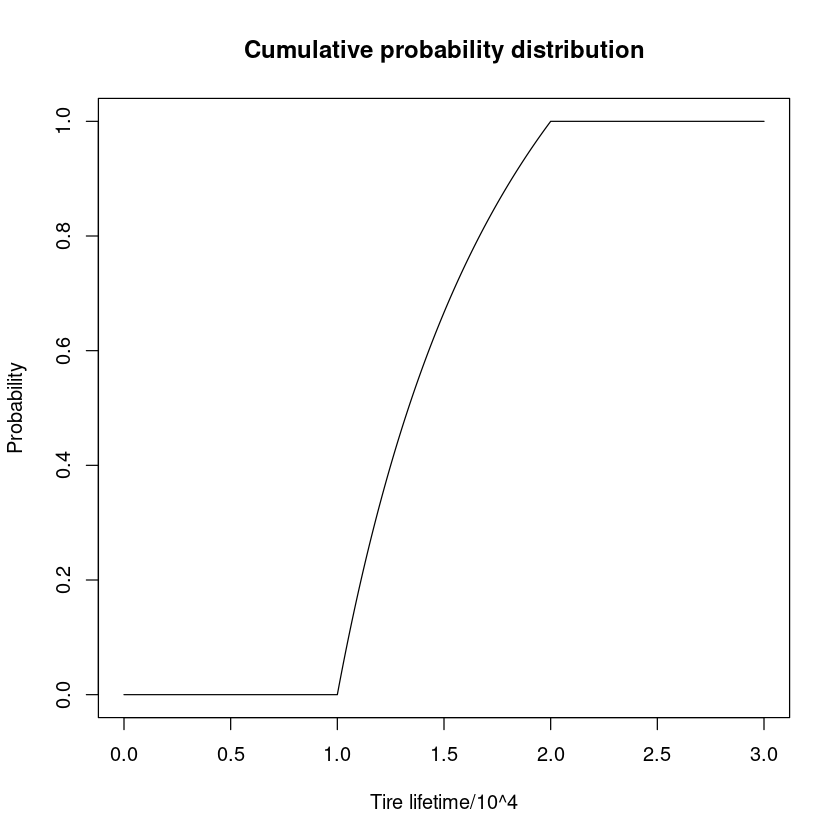

In [13]:
plot(seq(0,3,0.01),ptire(seq(0,3,0.01),), xlab = expression("Tire lifetime/10^4"), ylab = "Probability", main = "Cumulative probability distribution", type='l')

In [17]:
message("The probability that tires will last less than 15000 km is ",format(ptire(1.5), digits=4))

The probability that tires will last less than 15000 km is 0.6667



Using the function defined previously is possible to sample 3000 random variables and calculate their properties

In [20]:
samp = rtire(3000)

In [21]:
message("The mean for the sampled set is ",format(mean(samp),digits=4))

The mean for the sampled set is 1.377



In [23]:
message("The variance for the sampled set is ",format(mean(mean(samp^2)-mean(samp)^2),digits=4))

The variance for the sampled set is 0.07751

